In [1]:
import pandas as pd
import numpy as np
import re
import datetime
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

pd.set_option('display.max_colwidth', None)

In [2]:
inspections = pd.read_csv("prohlidky.csv")
inspections = inspections.drop(['Unnamed: 0'], axis=1)
inspections.DatKont = pd.to_datetime(inspections.DatKont)
inspections.DatPrvReg = pd.to_datetime(inspections.DatPrvReg)
display(inspections.head())
display(inspections.info())
display(inspections.describe())

,STK,DrTP,VIN,DatKont,TypMot,TZn,DrVoz,ObchOznTyp,Ct,DatPrvReg,Km,ZavA,ZavB,ZavC,VyslSTK,VyslEmise
0,3122,Evidencni kontrola,JMZBLA2G601258504,2018-01-02 11:03:12.833,LF,MAZDA,OSOBNI AUTOMOBIL,3,M1,2011-02-10,84818,0,0,0,zpusobile,---
1,3205,Evidencni kontrola,4150417,2018-01-02 11:06:07.617,EM150.2,MZ,MOTOCYKL,ETZ 150,L3e,1989-01-01,38828,0,0,0,zpusobile,---
2,3114,Evidencni kontrola,VF3MJAHXHGS280168,2018-01-02 11:15:08.083,AH01,PEUGEOT,OSOBNI AUTOMOBIL,3008,M1,2017-01-09,39227,0,0,0,zpusobile,---
3,3618,Evidencni kontrola,4699845,2018-01-02 11:19:22.967,1202,SKODA,OSOBNI AUTOMOBIL,1202,M1,1979-06-04,38951,0,0,0,zpusobile,---
4,3748,Evidencni kontrola,WF0SXXGCDSAU06730,2018-01-02 11:30:25.420,GPDC,FORD,OSOBNI AUTOMOBIL,FOCUS (DA3),M1,2010-06-29,254194,0,0,0,zpusobile,---


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3728369 entries, 0 to 3728368
Data columns (total 16 columns):
 #   Column      Dtype         
---  ------      -----         
 0   STK         int64         
 1   DrTP        object        
 2   VIN         object        
 3   DatKont     datetime64[ns]
 4   TypMot      object        
 5   TZn         object        
 6   DrVoz       object        
 7   ObchOznTyp  object        
 8   Ct          object        
 9   DatPrvReg   datetime64[ns]
 10  Km          int64         
 11  ZavA        int64         
 12  ZavB        int64         
 13  ZavC        int64         
 14  VyslSTK     object        
 15  VyslEmise   object        
dtypes: datetime64[ns](2), int64(5), object(9)
memory usage: 455.1+ MB


None

,STK,Km,ZavA,ZavB,ZavC
count,3.728369e+06,3.728369e+06,3.728369e+06,3.728369e+06,3.728369e+06
mean,3.525718e+03,1.583200e+05,2.001051e+00,1.660005e-01,9.282075e-03
std,3.388045e+02,1.429099e+05,2.571117e+00,8.030010e-01,1.350142e-01
min,3.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.245000e+03,6.002300e+04,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.524000e+03,1.457220e+05,1.000000e+00,0.000000e+00,0.000000e+00
75%,3.739000e+03,2.210340e+05,3.000000e+00,0.000000e+00,0.000000e+00
max,9.999000e+03,9.944330e+06,4.400000e+01,3.700000e+01,2.300000e+01


In [3]:
inspections['DatPrvReg'] = inspections['DatPrvReg'].apply(lambda x: pd.to_datetime('1910-01-01') if x.year < 1910 else x)
inspections['age'] = 2018 - inspections.DatPrvReg.dt.year

#convert category columns to codes 
string_cols = inspections.select_dtypes(['object']).columns
string_cols = string_cols.drop('VIN')
inspections[string_cols] = inspections[string_cols].astype('category').apply(lambda x: x.cat.codes)

In [4]:
data = inspections[['Km', 'TZn', 'age', 'ZavA', 'ZavB', 'ZavC', 'Ct', 'TypMot', 'DrVoz']].sample(50000)

#scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
#data = PCA(n_components=3).fit_transform(data)

sqrtDistSum = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(data)
    sqrtDistSum.append(kmeans.inertia_)

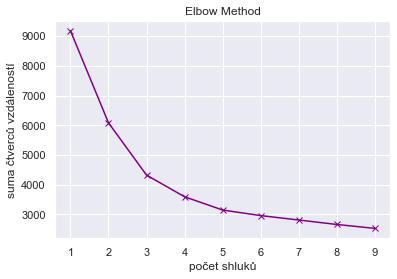

In [5]:
plt.plot(K, sqrtDistSum, 'bx-', color="purple")
plt.xlabel('počet shluků')
plt.ylabel('suma čtverců vzdáleností')
plt.title('Elbow Method')
plt.show()

In [6]:
data = inspections[['Km', 'TZn', 'age', 'ZavA', 'ZavB', 'ZavC', 'Ct', 'TypMot', 'DrVoz']]

#scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
#data = PCA(n_components=3).fit_transform(data)

kmeans = KMeans(n_clusters = 3, random_state = 1, n_jobs=-1, max_iter=1000, n_init=15).fit(data)

In [7]:
inspections['Cluster'] = kmeans.labels_

<IPython.core.display.Javascript object>


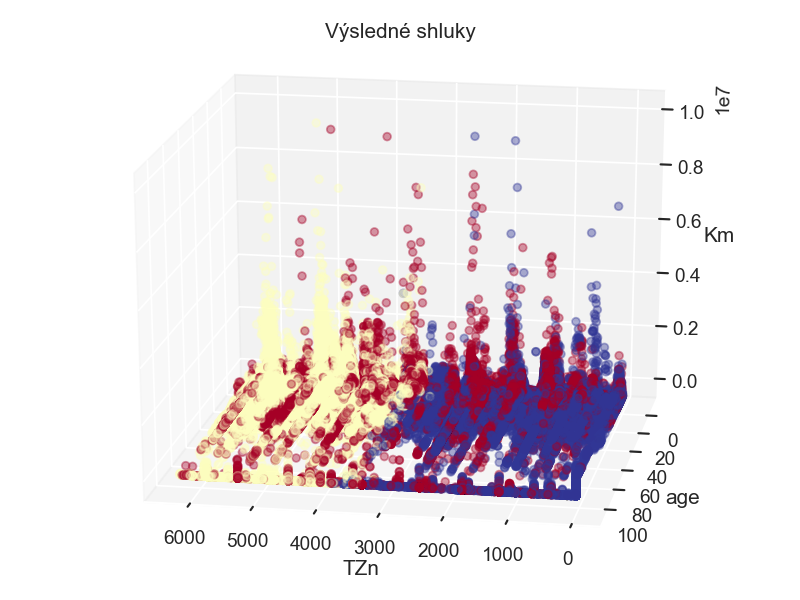

In [8]:
%matplotlib notebook

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(inspections.TZn, inspections.age, inspections.Km, c=kmeans.labels_, alpha=0.4, cmap="RdYlBu")

ax.set_xlabel('TZn')
ax.set_ylabel('age')
ax.set_zlabel('Km')
plt.title('Výsledné shluky')
plt.gca().patch.set_facecolor('white')
ax.view_init(20, 100)

<IPython.core.display.Javascript object>


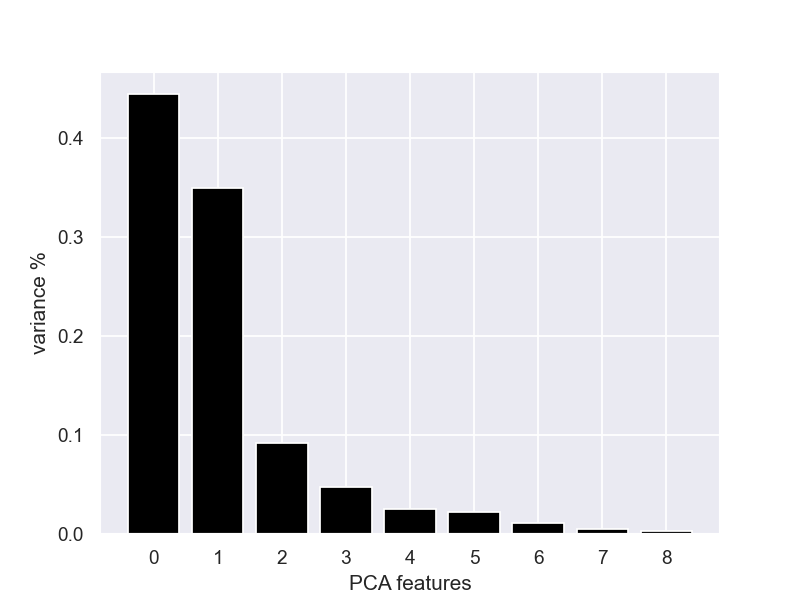

([<matplotlib.axis.XTick at 0x1f7068e9b88>,
 <a list of 9 Text major ticklabel objects>)

In [9]:
# best amount of components 

data = inspections[['Km', 'TZn', 'age', 'ZavA', 'ZavB', 'ZavC', 'Ct', 'TypMot', 'DrVoz']].sample(50000)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

pca = PCA(n_components=9)
principalComponents = pca.fit_transform(data)
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

<IPython.core.display.Javascript object>


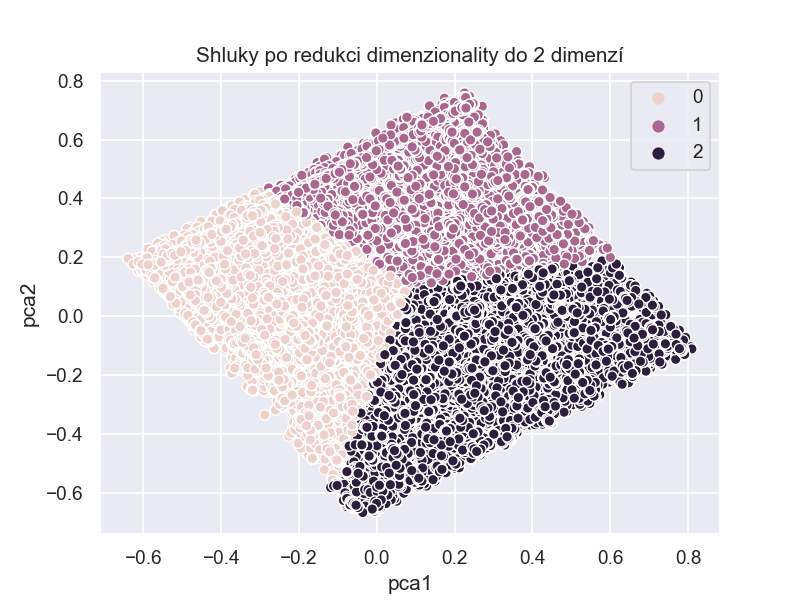

In [17]:
# Run PCA on the data and reduce the dimensions in 2 dimensions

data = inspections[['Km', 'TZn', 'age', 'ZavA', 'ZavB', 'ZavC', 'Ct', 'TypMot', 'DrVoz']]
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
kmeans = KMeans(n_clusters = 3, random_state = 1, n_jobs=-1, max_iter=1000, n_init=15).fit(results)

sns.scatterplot(x="pca1", y="pca2", hue=kmeans.labels_, data=results)
plt.title('Shluky po redukci dimenzionality do 2 dimenzí')
plt.show()

<IPython.core.display.Javascript object>


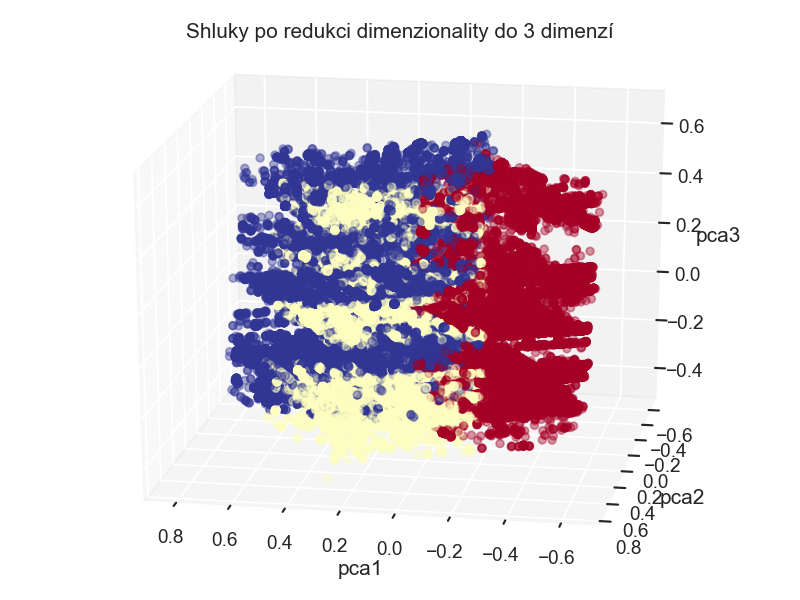

In [18]:
%matplotlib notebook

reduced_data = PCA(n_components=3).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2','pca3'])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(results.pca1, results.pca2, results.pca3, c=kmeans.labels_, alpha=0.4, cmap="RdYlBu")

ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')
plt.title('Shluky po redukci dimenzionality do 3 dimenzí')
plt.gca().patch.set_facecolor('white')
ax.view_init(20, 100)

In [19]:
inspections_old = pd.read_csv("prohlidky.csv")
inspections_old = inspections_old.drop(['Unnamed: 0'], axis=1)
inspections_old.DatKont = pd.to_datetime(inspections_old.DatKont)
inspections_old.DatPrvReg = pd.to_datetime(inspections_old.DatPrvReg)

inspections_old['Cluster'] = kmeans.labels_

cluster_1 = inspections_old[inspections_old['Cluster'] == 0]
cluster_2 = inspections_old[inspections_old['Cluster'] == 1]
cluster_3 = inspections_old[inspections_old['Cluster'] == 2]

In [20]:
cluster_1.to_csv('cluster_1.csv')
cluster_2.to_csv('cluster_2.csv')
cluster_3.to_csv('cluster_3.csv')

In [21]:
display(cluster_1.describe())
display(cluster_1.info())

,STK,Km,ZavA,ZavB,ZavC,Cluster
count,1.928379e+06,1.928379e+06,1.928379e+06,1.928379e+06,1.928379e+06,1928379.0
mean,3.518710e+03,1.658829e+05,1.968786e+00,1.521003e-01,8.580782e-03,0.0
std,3.087520e+02,1.395688e+05,2.481412e+00,7.568348e-01,1.269841e-01,0.0
min,3.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,3.243000e+03,7.485500e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,3.523000e+03,1.549870e+05,1.000000e+00,0.000000e+00,0.000000e+00,0.0
75%,3.739000e+03,2.287820e+05,3.000000e+00,0.000000e+00,0.000000e+00,0.0
max,9.999000e+03,9.944330e+06,3.100000e+01,3.200000e+01,1.400000e+01,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928379 entries, 2 to 3728368
Data columns (total 17 columns):
 #   Column      Dtype         
---  ------      -----         
 0   STK         int64         
 1   DrTP        object        
 2   VIN         object        
 3   DatKont     datetime64[ns]
 4   TypMot      object        
 5   TZn         object        
 6   DrVoz       object        
 7   ObchOznTyp  object        
 8   Ct          object        
 9   DatPrvReg   datetime64[ns]
 10  Km          int64         
 11  ZavA        int64         
 12  ZavB        int64         
 13  ZavC        int64         
 14  VyslSTK     object        
 15  VyslEmise   object        
 16  Cluster     int32         
dtypes: datetime64[ns](2), int32(1), int64(5), object(9)
memory usage: 257.5+ MB


None

In [22]:
display(cluster_2.describe())
display(cluster_2.info())

,STK,Km,ZavA,ZavB,ZavC,Cluster
count,585014.000000,5.850140e+05,585014.000000,585014.000000,585014.000000,585014.0
mean,3544.935629,1.335365e+05,1.945733,0.186999,0.010526,1.0
std,419.196255,1.412702e+05,2.639803,0.868769,0.149053,0.0
min,3100.000000,0.000000e+00,0.000000,0.000000,0.000000,1.0
25%,3302.000000,4.432000e+03,0.000000,0.000000,0.000000,1.0
50%,3526.000000,1.175860e+05,1.000000,0.000000,0.000000,1.0
75%,3740.000000,2.154355e+05,3.000000,0.000000,0.000000,1.0
max,9999.000000,9.584128e+06,31.000000,25.000000,23.000000,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 585014 entries, 5 to 3728367
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   STK         585014 non-null  int64         
 1   DrTP        585014 non-null  object        
 2   VIN         585014 non-null  object        
 3   DatKont     585014 non-null  datetime64[ns]
 4   TypMot      502495 non-null  object        
 5   TZn         584333 non-null  object        
 6   DrVoz       585012 non-null  object        
 7   ObchOznTyp  584331 non-null  object        
 8   Ct          585013 non-null  object        
 9   DatPrvReg   585014 non-null  datetime64[ns]
 10  Km          585014 non-null  int64         
 11  ZavA        585014 non-null  int64         
 12  ZavB        585014 non-null  int64         
 13  ZavC        585014 non-null  int64         
 14  VyslSTK     585006 non-null  object        
 15  VyslEmise   585014 non-null  object        
 16  C

None

In [23]:
display(cluster_3.describe())
display(cluster_3.info())

,STK,Km,ZavA,ZavB,ZavC,Cluster
count,1.214976e+06,1.214976e+06,1.214976e+06,1.214976e+06,1.214976e+06,1214976.0
mean,3.527586e+03,1.582496e+05,2.078896e+00,1.779517e-01,9.796078e-03,2.0
std,3.406990e+02,1.475097e+05,2.673667e+00,8.399433e-01,1.401642e-01,0.0
min,3.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.0
25%,3.301000e+03,6.197075e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.0
50%,3.525000e+03,1.396360e+05,1.000000e+00,0.000000e+00,0.000000e+00,2.0
75%,3.739000e+03,2.109380e+05,4.000000e+00,0.000000e+00,0.000000e+00,2.0
max,8.871000e+03,9.633091e+06,4.400000e+01,3.700000e+01,1.400000e+01,2.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1214976 entries, 0 to 3728363
Data columns (total 17 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   STK         1214976 non-null  int64         
 1   DrTP        1214976 non-null  object        
 2   VIN         1214976 non-null  object        
 3   DatKont     1214976 non-null  datetime64[ns]
 4   TypMot      1214976 non-null  object        
 5   TZn         1214849 non-null  object        
 6   DrVoz       1214974 non-null  object        
 7   ObchOznTyp  1214849 non-null  object        
 8   Ct          1214976 non-null  object        
 9   DatPrvReg   1214976 non-null  datetime64[ns]
 10  Km          1214976 non-null  int64         
 11  ZavA        1214976 non-null  int64         
 12  ZavB        1214976 non-null  int64         
 13  ZavC        1214976 non-null  int64         
 14  VyslSTK     1214966 non-null  object        
 15  VyslEmise   1214976 non-null  ob

None

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(cluster_1, title='Cluster #1 Profiling Report', html={'style':{'full_width':True}}, minimal=True)
profile.to_file(output_file="profile_report_cl_1.html")

In [ ]:
profile = ProfileReport(cluster_2, title='Cluster #2 Profiling Report', html={'style':{'full_width':True}}, minimal=True)
profile.to_file(output_file="profile_report_cl_2.html")

In [ ]:
profile = ProfileReport(cluster_3, title='Cluster #3 Profiling Report', html={'style':{'full_width':True}}, minimal=True)
profile.to_file(output_file="profile_report_cl_3.html")

In [42]:
display(inspections.groupby('Cluster')['age'].mean())
display(inspections.groupby('Cluster')['ZavA'].mean())
display(inspections.groupby('Cluster')['ZavB'].mean())
display(inspections.groupby('Cluster')['ZavC'].mean())
display(inspections.groupby('Cluster')['Km'].mean())

Cluster
0    13.248238
1    15.233690
2    12.803642
Name: age, dtype: float64

Cluster
0    1.965898
1    1.940562
2    2.085204
Name: ZavA, dtype: float64

Cluster
0    0.151696
1    0.186129
2    0.178886
Name: ZavB, dtype: float64

Cluster
0    0.008574
1    0.010422
2    0.009851
Name: ZavC, dtype: float64

Cluster
0    165477.848144
1    133068.768779
2    159118.330055
Name: Km, dtype: float64

In [60]:
inspections.groupby('Cluster').VyslSTK.mean()

Cluster
0    1.879808
1    1.855986
2    1.863040
Name: VyslSTK, dtype: float64